<a href="https://colab.research.google.com/github/RyukiKuwahara/from-zero/blob/main/from_zero_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
def function_and(x1, x2):
    w1, w2 = 1, 1
    b = -1.5
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

In [15]:
def function_or(x1, x2):
    w1, w2 = 1, 1
    b = -0.5
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

In [16]:
def function_nand(x1, x2):
    w1, w2 = -1, -1
    b = 1.5
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

In [17]:
def function_nor(x1, x2):
    w1, w2 = -1, -1
    b = 0.5
    y = x1 * w1 + x2 * w2 + b
    if y <= 0:
        return 0
    else:
        return 1

In [18]:
def print_truth_table(f):
    print("x1\tx2\ty")
    print("-" * 20)
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            print(f"{x1}\t{x2}\t{f(x1, x2)}")

In [19]:
print("and")
print_truth_table(function_and)
print("-" * 20)

print("or")
print_truth_table(function_or)
print("-" * 20)

print("nand")
print_truth_table(function_nand)
print("-" * 20)

print("nor")
print_truth_table(function_nor)


and
x1	x2	y
--------------------
0	0	0
0	1	0
1	0	0
1	1	1
--------------------
or
x1	x2	y
--------------------
0	0	0
0	1	1
1	0	1
1	1	1
--------------------
nand
x1	x2	y
--------------------
0	0	1
0	1	1
1	0	1
1	1	0
--------------------
nor
x1	x2	y
--------------------
0	0	1
0	1	0
1	0	0
1	1	0


In [20]:
function_xor = lambda x1, x2: function_and(function_or(x1, x2), function_nand(x2, x1))
print("xor")
print_truth_table(function_xor)

xor
x1	x2	y
--------------------
0	0	0
0	1	1
1	0	1
1	1	0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

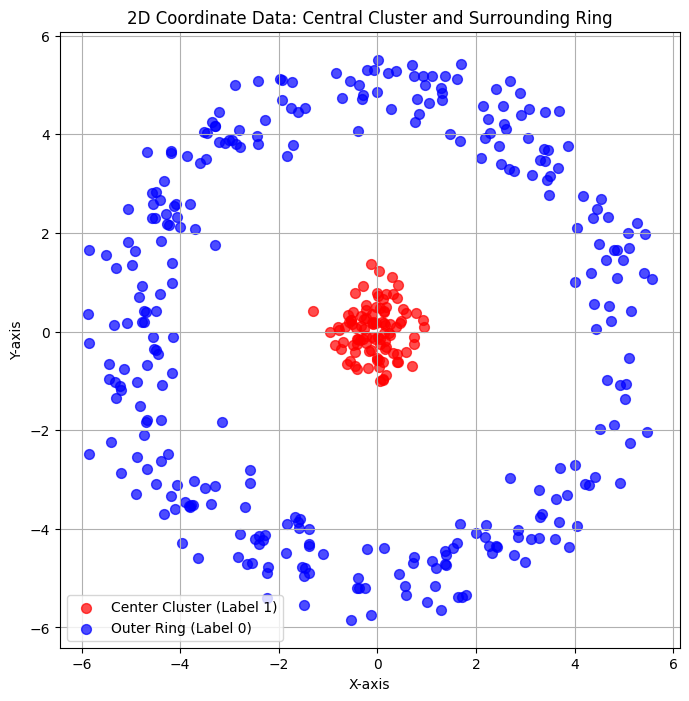

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from google.colab import files

# Parameters for the central cluster
n_samples_center = 100
centers = [(0, 0)]
cluster_std_center = 0.5
label_center = 1

# Parameters for the outer ring
n_samples_ring = 300
radius = 5
cluster_std_ring = 0.5
label_ring = 0

# Generate central cluster
X_center, _ = make_blobs(n_samples=n_samples_center, centers=centers, cluster_std=cluster_std_center, random_state=42)
y_center = np.full(n_samples_center, label_center)

# Generate outer ring
angles = 2 * np.pi * np.random.rand(n_samples_ring)
radii = radius + cluster_std_ring * np.random.randn(n_samples_ring)
X_ring = np.vstack((radii * np.cos(angles), radii * np.sin(angles))).T
y_ring = np.full(n_samples_ring, label_ring)

# Combine the datasets
X = np.vstack((X_center, X_ring))
y = np.hstack((y_center, y_ring))

# Create a DataFrame
df = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'label': y
})

# Save to CSV
df.to_csv('dataset.csv', index=False)

# Download the file
files.download('dataset.csv')

# Plotting the dataset with explicit color specification
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=50, alpha=0.7, c='red', label='Center Cluster (Label 1)')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=50, alpha=0.7, c='blue', label='Outer Ring (Label 0)')
plt.title("2D Coordinate Data: Central Cluster and Surrounding Ring")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


          x         y  label
0  0.236619 -0.036414      1
1 -0.419609 -0.154606      1
2 -0.959386 -0.013257      1
3 -0.239587 -0.092829      1
4 -0.487341  0.393542      1


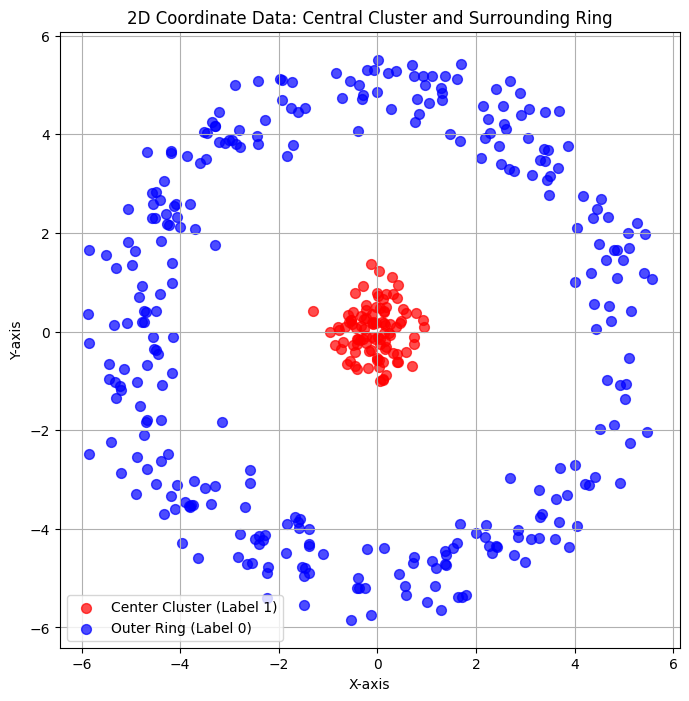

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Plotting the loaded dataset
plt.figure(figsize=(8, 8))
plt.scatter(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], s=50, alpha=0.7, c='red', label='Center Cluster (Label 1)')
plt.scatter(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], s=50, alpha=0.7, c='blue', label='Outer Ring (Label 0)')
plt.title("2D Coordinate Data: Central Cluster and Surrounding Ring")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
def my_activation_function(x):
    if x < 0:
        return 0
    else:
        return x

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def my_neural_network(x, y, activation_function):
    # layer1
    w_11 = {'w1': 1, 'w2': 1, 'b': -1.5}
    neuron11 = activation_function(w_11['w1'] * x + w_11['w2'] * y + w_11['b'])
    w_12 = {'w1': 1, 'w2': -1, 'b': -1.5}
    neuron12 = activation_function(w_12['w1'] * x + w_12['w2'] * y + w_12['b'])
    w_13 = {'w1': -1, 'w2': 1, 'b': -1.5}
    neuron13 = activation_function(w_13['w1'] * x + w_13['w2'] * y + w_13['b'])
    w_14 = {'w1': -1, 'w2': -1, 'b': -1.5}
    neuron14 = activation_function(w_14['w1'] * x + w_14['w2'] * y + w_14['b'])

    # layer2
    w_21 = {'w1': -1, 'w2': -1, 'w3': -1, 'w4': -1, 'b': 1}
    x = neuron11 * w_21['w1'] + neuron12 * w_21['w2'] + neuron13 * w_21['w3'] + neuron14 * w_21['w4'] + w_21['b']

    p = sigmoid(x)

    threshold = 0.5
    if p >= threshold:
        ans = 1
    else:
        ans = 0

    return ans

In [37]:
def print_result(df):
    cnt = 0
    predictions = []

    for index, row in df.iterrows():
        x = row['x']
        y = row['y']
        label = row['label']

        ans = my_neural_network(x, y, my_activation_function)
        predictions.append(ans)

        if ans == label:
            cnt += 1

    correction_rate = cnt / len(df) * 100
    print(f"Correction rate: {correction_rate:.2f}%")

    df['prediction'] = predictions

    # Plotting the actual labels
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], c='red', label='Actual Label 1', alpha=0.5)
    plt.scatter(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], c='blue', label='Actual Label 0', alpha=0.5)
    plt.title('Actual Labels')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Plotting the predicted labels
    plt.subplot(1, 2, 2)
    plt.scatter(df[df['prediction'] == 1]['x'], df[df['prediction'] == 1]['y'], c='red', label='Predicted Label 1', alpha=0.5)
    plt.scatter(df[df['prediction'] == 0]['x'], df[df['prediction'] == 0]['y'], c='blue', label='Predicted Label 0', alpha=0.5)
    plt.title('Predicted Labels')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    plt.show()

Correction rate: 100.00%


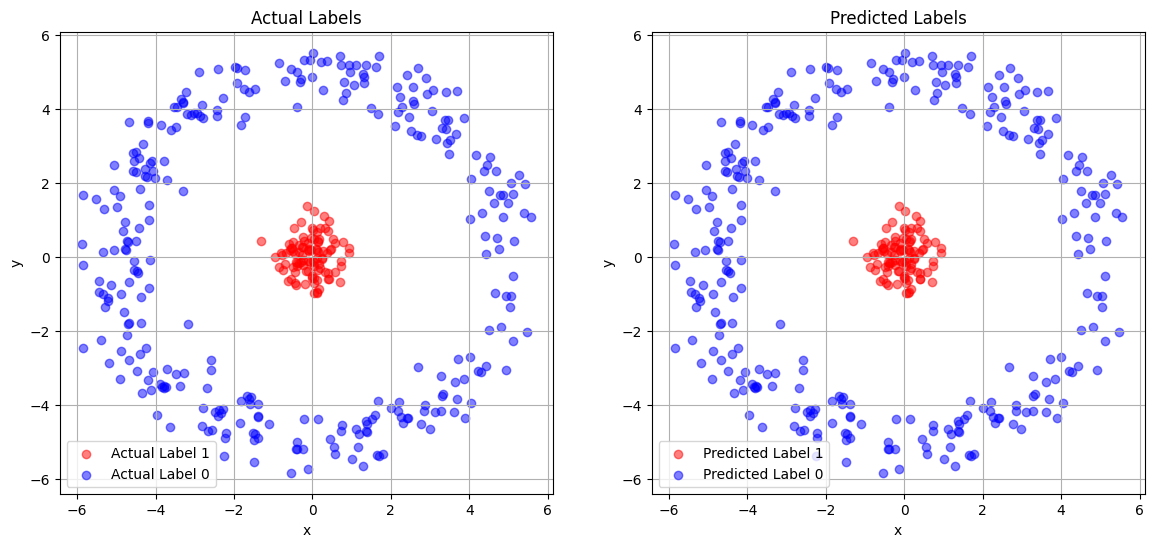

In [38]:
print_result(df)